In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from scipy import stats


In [33]:
# Specify the path to your CSV file
csv_file_path = '../../data/01-modified-data/combined_data_clean00.csv'

# Use the read_csv function to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

print(df.head())

   Site  Gender    Age  Handedness   DX  ADHD Index  Inattentive  \
0   2.0     1.0  15.68         1.0  2.0        35.0     9.948444   
1   2.0     0.0  14.99         1.0  0.0        43.0     9.948444   
2   2.0     0.0  15.16         1.0  2.0        54.0     9.948444   
3   2.0     0.0  15.20         1.0  0.0        35.0     9.948444   
4   2.0     0.0  14.56         1.0  1.0        50.0     9.948444   

   Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  
0         8.638132    0.100365      106.0           106.0     107.0  
1         8.638132    0.100365      119.0           123.0     125.0  
2         8.638132    0.100365      116.0           131.0     126.0  
3         8.638132    0.100365      127.0            98.0     113.0  
4         8.638132    0.100365       95.0            87.0      89.0  


In [59]:
df.describe()

,Site,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full4 IQ
count,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.343234,0.508251,10.304127,1.0,0.326733,31.851802,36.145511,35.641222,1.771639,100.688052,102.164299,113.282022
std,2.114522,0.500759,1.853867,0.0,0.559841,20.904502,22.933586,24.287444,0.849920,21.072014,17.496362,12.715782
min,1.000000,0.000000,7.170000,1.0,0.000000,8.066304,9.000000,8.638132,0.100365,75.571739,71.000000,81.000000
25%,1.000000,0.000000,8.850000,1.0,0.000000,8.066304,14.000000,11.000000,1.000000,75.571739,83.647826,106.000000
50%,3.000000,1.000000,9.920000,1.0,0.000000,34.000000,40.000000,41.000000,2.000000,103.591826,103.000000,111.000000
75%,6.000000,1.000000,11.590000,1.0,1.000000,44.000000,50.000000,48.000000,2.000000,119.000000,115.000000,122.000000
max,6.000000,1.000000,15.790000,1.0,2.000000,90.000000,90.000000,90.000000,3.000000,146.000000,146.000000,144.000000


In [34]:
df.isna().sum()

Site                0
Gender              0
Age                 0
Handedness          0
DX                 54
ADHD Index          0
Inattentive         0
Hyper/Impulsive     0
IQ Measure          0
Verbal IQ           0
Performance IQ      0
Full4 IQ            0
dtype: int64

In [35]:
df= df.dropna()

print(df)

     Site  Gender    Age  Handedness   DX  ADHD Index  Inattentive  \
0     2.0     1.0  15.68         1.0  2.0   35.000000     9.948444   
1     2.0     0.0  14.99         1.0  0.0   43.000000     9.948444   
2     2.0     0.0  15.16         1.0  2.0   54.000000     9.948444   
3     2.0     0.0  15.20         1.0  0.0   35.000000     9.948444   
4     2.0     0.0  14.56         1.0  1.0   50.000000     9.948444   
..    ...     ...    ...         ...  ...         ...          ...   
350   1.0     1.0  12.92         1.0  1.0   42.000000    24.000000   
351   1.0     1.0  11.50         1.0  0.0   34.000000    17.000000   
352   1.0     1.0  12.42         1.0  1.0   56.000000    34.000000   
353   1.0     0.0   9.17         1.0  0.0   42.604679    44.551369   
356   1.0     1.0   9.50         1.0  1.0   50.000000    27.000000   

     Hyper/Impulsive  IQ Measure   Verbal IQ  Performance IQ   Full4 IQ  
0           8.638132    0.100365  106.000000           106.0  107.00000  
1          

In [36]:
df.isna().sum()

Site               0
Gender             0
Age                0
Handedness         0
DX                 0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
dtype: int64

In [37]:
def count_outliers(data):
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            print(f"{column}: {len(outliers)} outliers")

# Example usage:
# df = pd.DataFrame({your_data})
count_outliers(df)

Site: 0 outliers
Gender: 0 outliers
Age: 1 outliers
Handedness: 0 outliers
DX: 0 outliers
ADHD Index: 0 outliers
Inattentive: 0 outliers
Hyper/Impulsive: 0 outliers
IQ Measure: 0 outliers
Verbal IQ: 0 outliers
Performance IQ: 0 outliers
Full4 IQ: 1 outliers


We can ignore the above outliers. Check the dataset after cleaning. Those outliers are not erroneous values. They are required for further analysis to draw more insights. 

(array([ 3.,  5.,  5.,  2.,  3., 12., 11., 14., 14.,  8., 15., 10., 13.,
        14., 14., 13.,  7.,  3., 14.,  3., 12.,  5.,  8.,  6.,  5.,  9.,
         8., 18.,  6.,  3.,  5.,  3.,  2.,  3.,  1.,  1.,  2.,  2.,  4.,
         4.,  2.,  1.,  2.,  1.,  1.,  1.,  3.,  0.,  0.,  2.]),
 array([ 7.17  ,  7.3424,  7.5148,  7.6872,  7.8596,  8.032 ,  8.2044,
         8.3768,  8.5492,  8.7216,  8.894 ,  9.0664,  9.2388,  9.4112,
         9.5836,  9.756 ,  9.9284, 10.1008, 10.2732, 10.4456, 10.618 ,
        10.7904, 10.9628, 11.1352, 11.3076, 11.48  , 11.6524, 11.8248,
        11.9972, 12.1696, 12.342 , 12.5144, 12.6868, 12.8592, 13.0316,
        13.204 , 13.3764, 13.5488, 13.7212, 13.8936, 14.066 , 14.2384,
        14.4108, 14.5832, 14.7556, 14.928 , 15.1004, 15.2728, 15.4452,
        15.6176, 15.79  ]),
 <BarContainer object of 50 artists>)

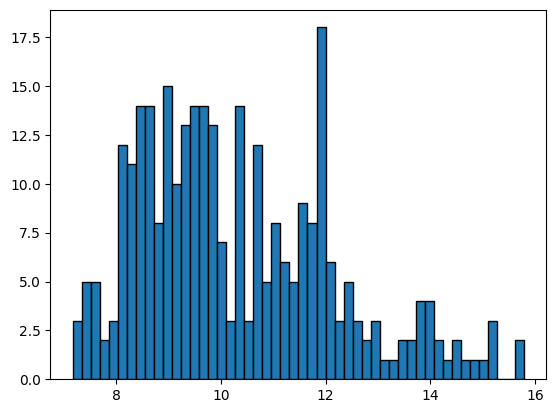

In [38]:
#From this histogram we can say that the ADHD participants are mostly between age groups 8 and 16
plt.hist(df['Age'], bins=50, edgecolor='k') 

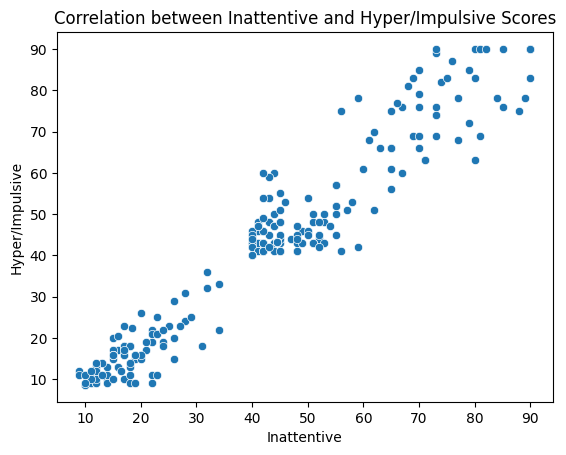

In [39]:
# Correlation between Inattentive and Hyper/Impulsive Scores
sns.scatterplot(x='Inattentive', y='Hyper/Impulsive', data=df)
plt.title('Correlation between Inattentive and Hyper/Impulsive Scores')
plt.show()

Inattentiveness and Impulsivity are two common attributes of ADHD. We can see a positive correlation between both the variables, suggesting that they are associated. The ADHD patients with high inattentives, might have high impulsivity or one might lead to another.

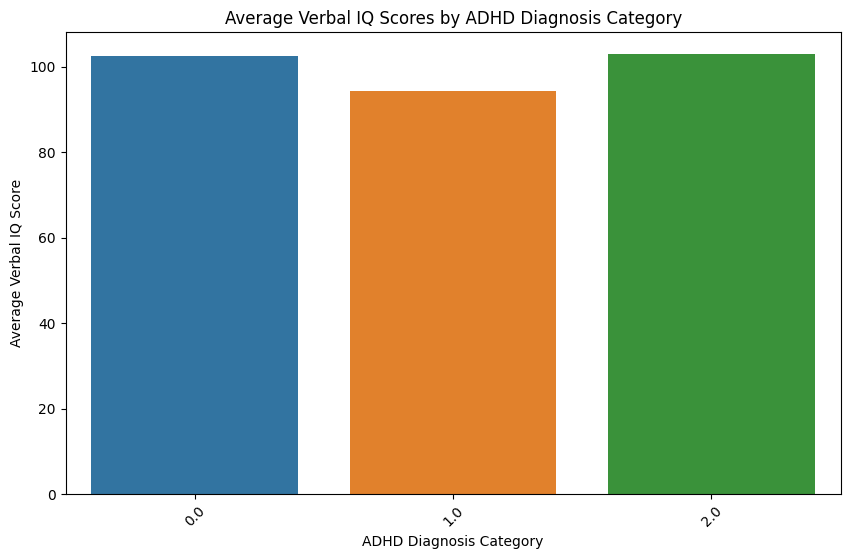

In [40]:
# Creating a DataFrame to store the average Verbal IQ scores for each ADHD diagnosis category
data = df
verbal_iq_by_adhd_category = df.groupby('DX')['Verbal IQ'].mean().reset_index()

# Plotting the results for Verbal IQ
plt.figure(figsize=(10, 6))
sns.barplot(x='DX', y='Verbal IQ', data=verbal_iq_by_adhd_category)
plt.title('Average Verbal IQ Scores by ADHD Diagnosis Category')
plt.ylabel('Average Verbal IQ Score')
plt.xlabel('ADHD Diagnosis Category')
plt.xticks(rotation=45)
plt.show()

More broadly, it is linked to problem solving, abstract reasoning, and working memory.There are apparent differences in the average Verbal IQ scores among the ADHD diagnosis categories. This could indicate that Verbal IQ is variably affected by different types of ADHD.While the plot provides a visual representation, further statistical analysis would be required to determine the significance of these differences.

In [41]:
#conduct anova test to see if there is statiscally significant difference in Verbal IQ scores among the three ADHD diagnosis categories
from scipy.stats import f_oneway
import numpy as np

# Getting unique ADHD diagnosis categories
adhd_categories = data['DX'].unique()

# Creating a list to store Verbal IQ scores for each category
# We will also ensure that we sample an equal number of observations from each category
min_sample_size = min(data['DX'].value_counts())  # Finding the minimum sample size across categories
verbal_iq_samples = []

for category in adhd_categories:
    sample = data[data['DX'] == category]['Verbal IQ'].sample(min_sample_size, random_state=1)
    verbal_iq_samples.append(sample)

# Conducting the ANOVA test
f_stat, p_value = f_oneway(*verbal_iq_samples)

# Displaying the F-statistic and p-value
f_stat, p_value

(3.5392436378501952, 0.03868518536792531)

The above values indicate that there are statistically significant differences in Verbal IQ scores among the ADHD diagnosis categories included in the analysis.

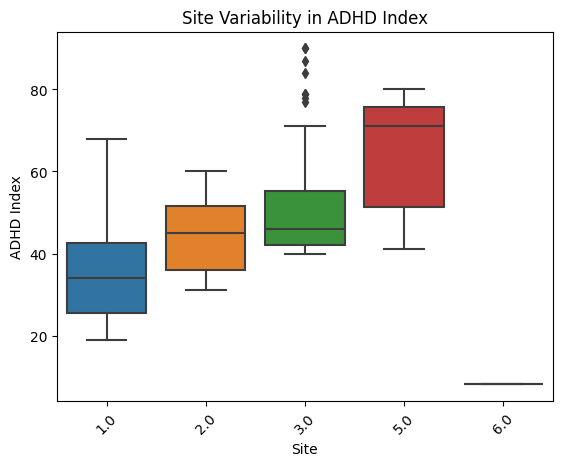

In [42]:
# ADHD Index in different Sitesy
sns.boxplot(x='Site', y='ADHD Index', data=df)
plt.xticks(rotation=45)
plt.title('Site Variability in ADHD Index')
plt.show()

Is there a correlation between age and the severity of ADHD symptoms as measured by the ADHD index?

From the below scatter plot we dont see any correlation. But we can observe that the participants between the age of 8 and 12, have similar ADHD Index. 

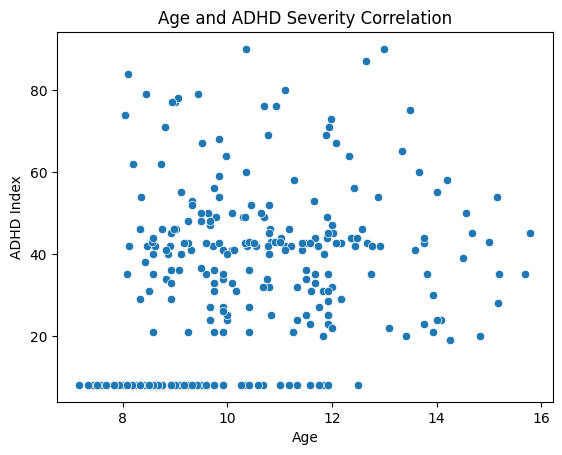

In [43]:
# Age and ADHD Severity Correlation
sns.scatterplot(x='Age', y='ADHD Index', data=df)
plt.title('Age and ADHD Severity Correlation')
plt.show()

The below tests suggest that there is a statistically significant very moderate positive correlation between age and the severity of ADHD symptoms as measured by the ADHD index. It supports the above EDA.

In [44]:
# Extracting age and ADHD index values
age = data['Age']
adhd_index = data['ADHD Index']

# Ensure there are no missing values in these columns
if not age.isnull().any() and not adhd_index.isnull().any():
    # Pearson's correlation
    pearson_corr, pearson_p = pearsonr(age, adhd_index)
    print(f"Pearson's correlation: {pearson_corr}, P-value: {pearson_p}")

# Spearman's rank correlation
spearman_corr, spearman_p = spearmanr(age, adhd_index)
print(f"Spearman's rank correlation: {spearman_corr}, P-value: {spearman_p}")


Pearson's correlation: 0.3101172481015408, P-value: 3.540521026496185e-08
Spearman's rank correlation: 0.35938985179456373, P-value: 1.1433896709914024e-10


In [45]:
# Assuming 'Handedness' is coded as 1 for right-handed and 0 for left-handed
# Adjust the code if the coding is different
left_handed_adhd_scores = data[data['Gender'] == 0]['ADHD Index']
right_handed_adhd_scores = data[data['Gender'] == 1]['ADHD Index']

# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_ind(left_handed_adhd_scores, right_handed_adhd_scores, nan_policy='omit')

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in ADHD scores between left-handed and right-handed individuals.")
else:
    print("There is no statistically significant difference in ADHD scores between left-handed and right-handed individuals.")


T-statistic: -1.140797487395754
P-value: 0.2548610506601483
There is no statistically significant difference in ADHD scores between left-handed and right-handed individuals.


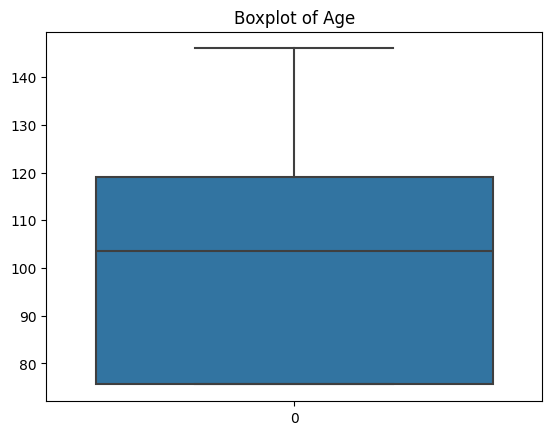

In [46]:
#Box-plot helps us see if there are any outliers.
#In the data cleaning step we removed the outliers
sns.boxplot(df['Verbal IQ'])

# Set the title
plt.title('Boxplot of Age')

# Show the boxplot
plt.show()

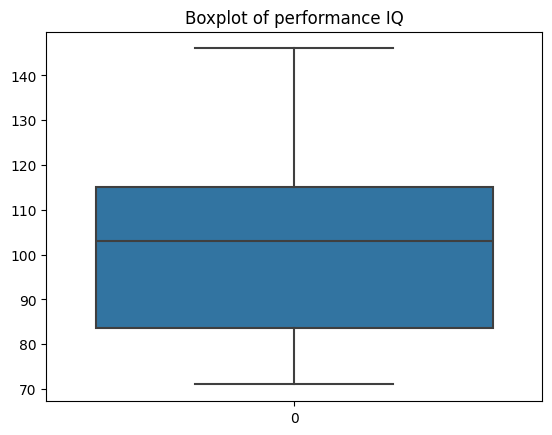

In [47]:
# dots represent outliers
sns.boxplot(df['Performance IQ'])

# Set the title
plt.title('Boxplot of performance IQ')

# Show the boxplot
plt.show()

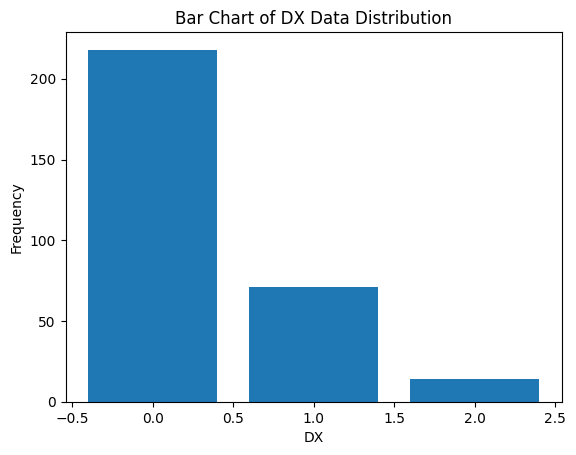

In [48]:
#We can see that there are more participants with ADHD combined (ADHD-C) type than ADHD-1 type. 
frequency_distribution = df['DX'].value_counts()
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('DX')
plt.ylabel('Frequency')
plt.title('Bar Chart of DX Data Distribution')
plt.show()

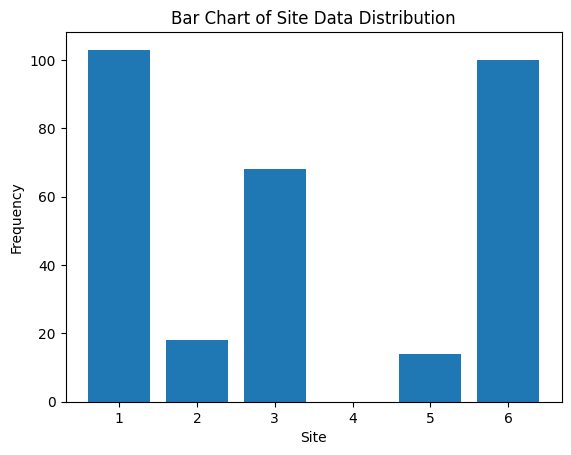

In [49]:
# to assess number of participants taken in each site. we considered adhd participants from 6 sites on whole. 
frequency_distribution = df['Site'].value_counts()
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('Site')
plt.ylabel('Frequency')
plt.title('Bar Chart of Site Data Distribution')
plt.show()

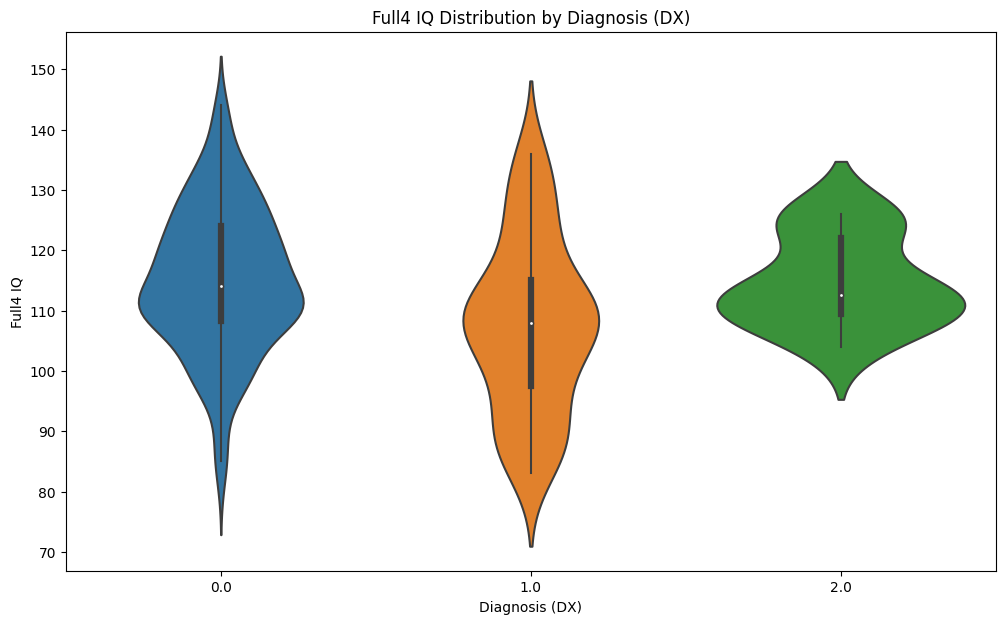

In [50]:
# Creating a violin plot for the 'Full4 IQ' distribution across 'DX' (Diagnosis) categories
plt.figure(figsize=(12, 7))
sns.violinplot(x='DX', y='Full4 IQ', data=df)

# Adding titles and labels
plt.title('Full4 IQ Distribution by Diagnosis (DX)')
plt.xlabel('Diagnosis (DX)')
plt.ylabel('Full4 IQ')

# Showing the plot
plt.show()

Distribution Shape: Each 'violin' shows the kernel density estimation of the Full4 IQ for each diagnosis category. Wider sections indicate a higher density of data points at those IQ scores.

Median and Quartiles: The thick bar in the middle of each violin represents the interquartile range, with the white dot denoting the median IQ score.

Comparisons Between Diagnoses: By comparing the shapes and sizes of the violins, you can observe differences or similarities in the IQ distributions across different diagnostic categories.

Data Spread and Outliers: The thin lines extending from the violins indicate the overall range of IQ scores, including potential outliers or extreme values.

this plot can help you understand the distribution of Full4 IQ scores across different diagnostic categories, revealing insights into the variability, central tendency, and spread of IQ scores in each group.

<Axes: >

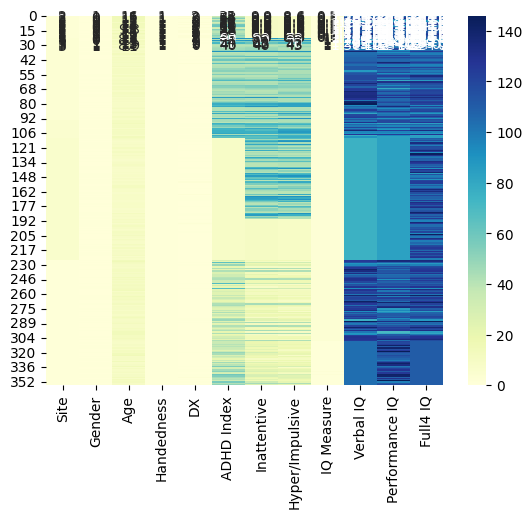

In [51]:
sns.heatmap(df, annot=True, cmap="YlGnBu")

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


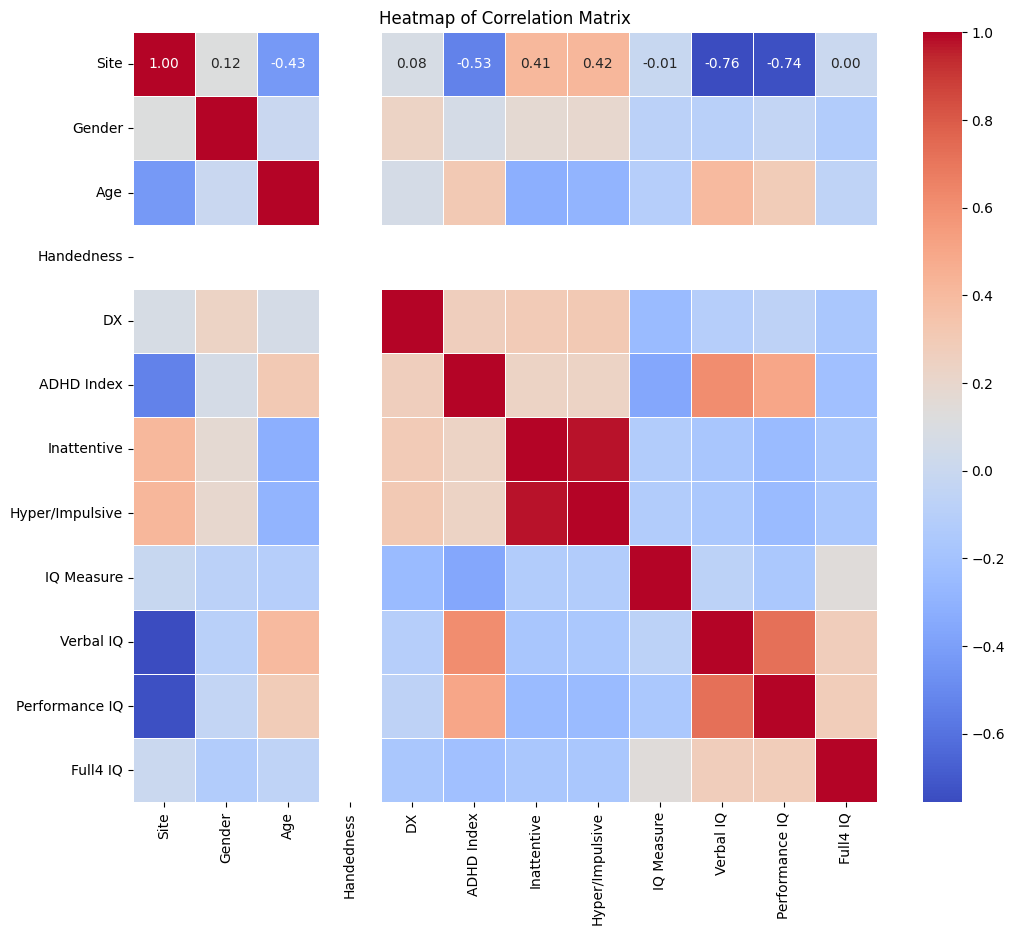

In [52]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Adding titles and labels
plt.title('Heatmap of Correlation Matrix')

# Showing the plot
plt.show()

Color Intensity and Direction: The color intensity indicates the strength of the correlation. Warm colors (like red) represent positive correlations, where variables tend to increase together. Cool colors (like blue) represent negative correlations, where one variable tends to increase as the other decreases.

In [53]:
#relationships between variables
#correlation matrix
# to show the correlation of every column with another one
correlation = df.corr()
correlation
#sns.heatmap()

,Site,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full4 IQ
Site,1.000000,0.116149,-0.433894,NaN,0.078376,-0.531638,0.412327,0.417463,-0.014845,-0.756349,-0.739890,0.004897
Gender,0.116149,1.000000,-0.003033,NaN,0.232485,0.065613,0.175079,0.190928,-0.079592,-0.092593,-0.041694,-0.125891
Age,-0.433894,-0.003033,1.000000,NaN,0.061087,0.310117,-0.321311,-0.294658,-0.108746,0.399463,0.288884,-0.059518
Handedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DX,0.078376,0.232485,0.061087,NaN,1.000000,0.270335,0.300136,0.311944,-0.252506,-0.109114,-0.066558,-0.172660
ADHD Index,-0.531638,0.065613,0.310117,NaN,0.270335,1.000000,0.238173,0.237395,-0.361975,0.610596,0.501267,-0.217822
Inattentive,0.412327,0.175079,-0.321311,NaN,0.300136,0.238173,1.000000,0.972778,-0.129250,-0.178590,-0.252531,-0.169198
Hyper/Impulsive,0.417463,0.190928,-0.294658,NaN,0.311944,0.237395,0.972778,1.000000,-0.127214,-0.164544,-0.250974,-0.171905
IQ Measure,-0.014845,-0.079592,-0.108746,NaN,-0.252506,-0.361975,-0.129250,-0.127214,1.000000,-0.071683,-0.162101,0.137210
Verbal IQ,-0.756349,-0.092593,0.399463,NaN,-0.109114,0.610596,-0.178590,-0.164544,-0.071683,1.000000,0.719326,0.272776


In [54]:
correlation["Performance IQ"]
#we can see a strong correlation between Performance.IQ and Full4.IQ

Site              -0.739890
Gender            -0.041694
Age                0.288884
Handedness              NaN
DX                -0.066558
ADHD Index         0.501267
Inattentive       -0.252531
Hyper/Impulsive   -0.250974
IQ Measure        -0.162101
Verbal IQ          0.719326
Performance IQ     1.000000
Full4 IQ           0.285924
Name: Performance IQ, dtype: float64

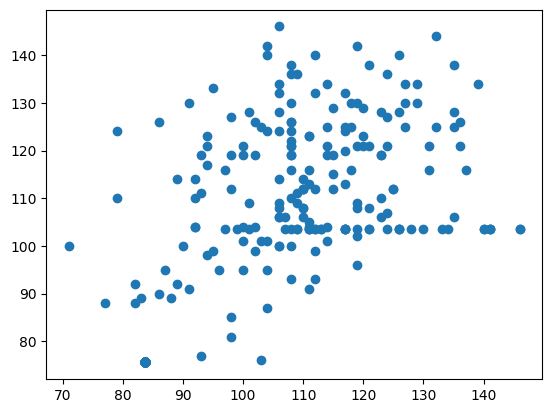

In [55]:
#poisitive relationship
plt.scatter(df['Performance IQ'], df['Verbal IQ'])

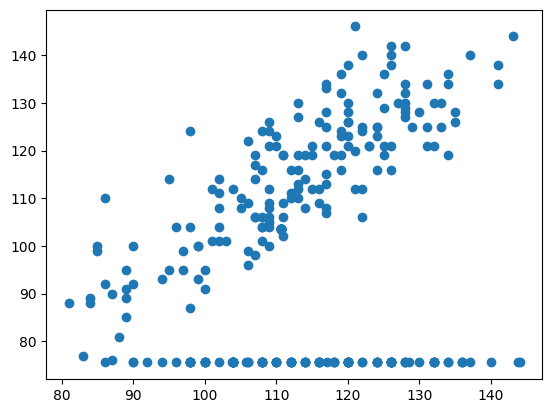

In [56]:
#strong poisitive relationship
plt.scatter(df['Full4 IQ'], df['Verbal IQ'])

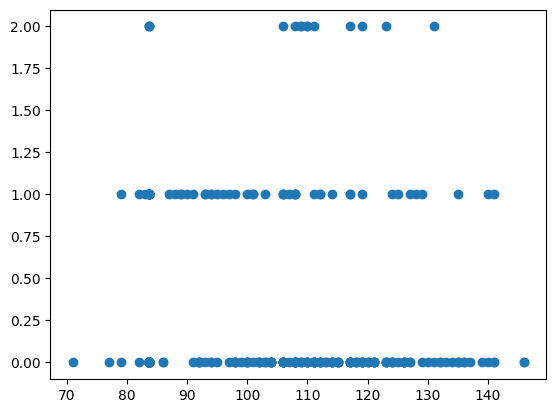

In [57]:
#no much correlation
plt.scatter(df['Performance IQ'], df['DX'])

In [58]:
df.to_csv('../../data/01-modified-data/combined_data_clean01.csv', index=False)